# Toy problem: Counting orthogonal rectangles in orthogonal point set

From: https://www.youtube.com/watch?v=EuPSibuIKIg

Given a point set P of points that lie on an x/y axis orthogonal grid, count the number of orthogoral rectangles (with axes parallel to the x/y axes).

In [100]:
# Some setup for the notebook

import matplotlib.pyplot as plt

# Update booleans print_debug_log & print_vis_bool to print intermediate logs and 
# a visualization of the point, respectively 

print_debug_log = False
print_vis_bool = True

def debug_log(*args):
    if print_debug_log:
        print(*args)


In [70]:
# Point sets

# Here are two example point sets that we can work with for this example:

q0 = (0,0)
q1 = (0,1) 
q2 = (0,2) 
q3 = (0,3) 
q4 = (1,0) 
q5 = (1,2) 
q6 = (1,3) 
q7 = (2,0) 
q8 = (2,2) 
q9 = (2,3) 
q10 = (3,0) 
q11 = (3,1)

given_points = {q0, q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, q11}

p0 = (0,0)
p1 = (0,1)
p2 = (1,3)
p3 = (0,2)
p4 = (4,0)
p5 = (2,1)
p6 = (4,3)
p7 = (5,2)
p8 = (5,0)

given_points_b = {p0, p1, p2, p3, p4, p5, p6, p7, p8}

### Some visualizations:



In [104]:
def make_vis(given_points):
    """Creates a visualization of a point set."""
    for point in given_points:
        x = point[0]
        y = point[1]
        points_vis = plt.scatter(x, y, s=10)
    return points_vis

def clean_vis(points_vis):
    """Cleans up a visualization from make_vis by removing the axes. """
    points_vis.axes.get_xaxis().set_visible(False)
    points_vis.axes.get_yaxis().set_visible(False)


### Building a solution:

The number of orthogonal rectangles is 10.0


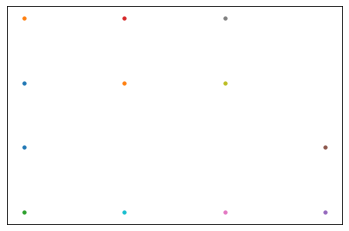

In [105]:
# Naive solution (brute force), iterate over points 
# (nxm where n is # of x cols, m is # of y rows)
# We assume points are given as a set of tuples

# Assume points are ordered!
# If they aren't, uncomment and use given_points_sorted:
# given_points_sorted = sorted(given_points)

# Separate set into rows:
def sort_into_rows(given_points):
    """ Takes a list of SORTED point tuples (x,y) and creates a list L of sets [,,,,].
    Each set s in L corresponds to a row of points (all having the same value of x, x_i),
    and each set s is a set of the y values of all points of the form (x_i, y)
    
    E.g. 
    given_points = {(0,1), (1,0), (1,1)}
    sorted_into_rows(given_points) returns: [{1}, {0,1}]
    """
    row_sets = []
    current_x = -1
    for point in given_points:
        x = point[0]
        y = point[1]
        if x > current_x:
            current_x = x
            row_sets.append({y})
        else:
            row_sets[-1].add(y)
    debug_log('row_sets =', row_sets)
    return row_sets


def row_intersection_dict(row_sets):
    """ Takes a list of lists (the output row_lists from sorted_into_rows), and outputs
    a dictionary row_intersections_dict.
    Each key of row_intersections_dict is a tuple pair (x_i, x_j) with value t, where t is
    the size of the intersection of rows x_i and x_j.
    """
    counter = 0
    row_intersection_dict = {}
    for i in range(len(row_sets)):
        debug_log('i = ', i)
        for j in range(i+1,len(row_sets)):
            debug_log('j = ', j)
            #row_intersection_dict[(i,j)] = 
            intersection = set(row_sets[i]).intersection(row_sets[j])
            # For testing:
            debug_log('intersect:', intersection, '(of sets', row_sets[i], 'and', row_sets[j])
            # counter will be updated as we find rectangles in the point set
            k = len(intersection)
            # of rectangles on rows x_i & x_j = (k choose 2)
            debug_log((k*(k-1))//2,'rectangles between rows', i, 'and', j)
            counter += (k*(k-1))/2
    return counter
    
def main(given_points):
    """ Calls functions sort_into_rows and row_intersection_dict to count the # of rectangles &
    toggle the visualization dispaly on/off.
    """
    sorted_points = sorted(given_points)
    row_sets = sort_into_rows(sorted_points)
    number_of_rectangles = row_intersection_dict(row_sets)
    print('The number of orthogonal rectangles is', number_of_rectangles)
    
    if print_vis_bool:    
        points_vis = make_vis(given_points)
        clean_vis(points_vis)
    

# Input point set argument
main(given_points)